In [1]:
import cv2
from google.colab.patches import cv2_imshow

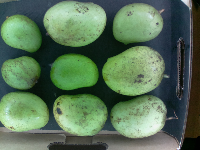

In [102]:
image = cv2.imread('/content/2021-08-04 13_11_45.jpg')
image = cv2.resize(image, (200, 150))
cv2_imshow(image)

In [103]:
import numpy as np
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

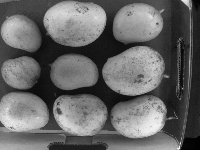

In [104]:
cv2_imshow(gray_image)

MeanShift Algorithm

In [45]:
flat_image = np.resize(gray_image, (150*200, 1))
print(flat_image.shape)

(30000, 1)


In [30]:
import sklearn.cluster
bandwidth = sklearn.cluster.estimate_bandwidth(flat_image, quantile=0.3, n_samples=300)
ms = sklearn.cluster.MeanShift(bandwidth=bandwidth)
ms.fit(flat_image)

MeanShift(bandwidth=32.75333333333333)

In [67]:
labels = ms.labels_
labels.shape
print(image.shape)

(150, 200, 3)


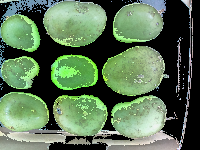

In [68]:
mask = np.reshape(labels, (150,200))
mask = mask * 255.0
mask = np.reshape(mask, (150,200,1))
new_image = np.multiply(image, mask)
cv2_imshow(new_image/255.0)

### Watershed Algorithm

In [50]:
#Finding sure Background using operations like opening and dilation

In [51]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

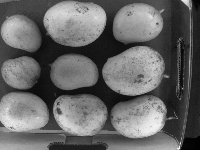

In [105]:
img = cv2.imread('/content/2021-08-04 13_11_45.jpg')
image = cv2.resize(image, (200, 150))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

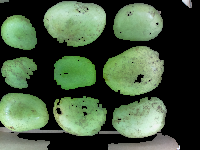

In [148]:
#Applying dilation for sure_bg detection

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

#Defining kernel for opening operation

kernel = np.ones((3,3), np.uint8)

#Opening 

opening1 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)
opening = opening1 > 127.5
opening = 1* opening
opening = np.multiply(image, np.reshape(opening, (150,200,1)))
cv2_imshow(opening)

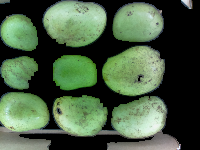

In [144]:
#Dilation
sure_bg = cv2.dilate(opening1, kernel, iterations=1)
sure_bg = sure_bg > 127.5
sure_bg = 1* sure_bg
back_ground = np.multiply(image, np.reshape(sure_bg, (150,200,1)))
cv2_imshow(back_ground)

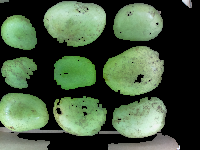

In [151]:
dist_transform = cv2.distanceTransform(opening1,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.00001*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

sure_fg = sure_fg > 127.5
sure_fg = 1* sure_fg
sure_fg = np.multiply(image, np.reshape(sure_fg, (150,200,1)))
cv2_imshow(sure_fg)

In [154]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

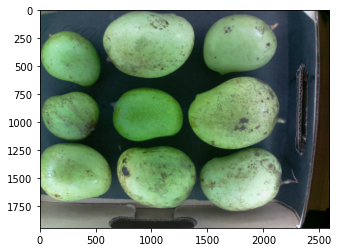

In [155]:
img = io.imread('/content/2021-08-04 13_11_45.jpg')
plt.imshow(img/255.0)

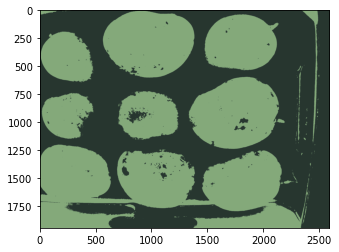

In [160]:
data = np.reshape((img/255.0), (-1,3))


kmeans =  KMeans(2).fit(data)
colors_after_clustering = kmeans.cluster_centers_[kmeans.predict(data)]
image_after_clustering = np.reshape(colors_after_clustering  , (img.shape))
plt.imshow(image_after_clustering)
plt.imsave('Image_after_compressing_into_1_cluster.png',image_after_clustering)

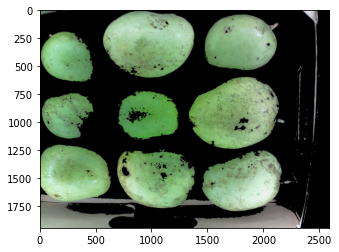

In [161]:


image_after_clustering1 = image_after_clustering > 0.30
result = np.multiply(np.reshape(image_after_clustering1, (img.shape)), img)
plt.imshow(result)